In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Obtaining the S&P Case-Schiller Home Price Index 

In [6]:
csi = pd.read_csv('case-schiller-home-price-index.csv',names=['obs_date','cs_index'],index_col='obs_date',header = 0,skiprows =156)
print(csi.describe())
print(csi.head())

         cs_index
count  265.000000
mean   166.578777
std     37.109832
min    100.000000
25%    141.943000
50%    164.687000
75%    184.250000
max    281.851000
          cs_index
obs_date          
1/1/2000   100.000
2/1/2000   100.571
3/1/2000   101.466
4/1/2000   102.540
5/1/2000   103.701


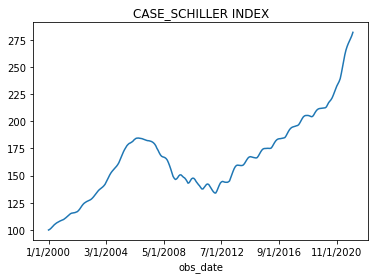

In [8]:
csi['cs_index'].plot()
plt.title('CASE_SCHILLER INDEX')
plt.show()

# DEMAND FEATURES

### 1. Mortgage rates

In [19]:
mort_rates = pd.read_csv('mortgage_rates.csv',names=['obs_date','mortgage_rates'],header = 0,skiprows =1501)
print(mort_rates.describe())
print(mort_rates.head())

       mortgage_rates
count     1162.000000
mean         4.980904
std          1.367837
min          2.650000
25%          3.880000
50%          4.665000
75%          6.110000
max          8.640000
     obs_date  mortgage_rates
0  2000-01-07            8.15
1  2000-01-14            8.18
2  2000-01-21            8.26
3  2000-01-28            8.25
4  2000-02-04            8.25


#### This is a weekly data, hence considering the average over month 

In [24]:
mort_rates['month'] = pd.DatetimeIndex(mort_rates['obs_date']).month
mort_rates['year'] = pd.DatetimeIndex(mort_rates['obs_date']).year

In [126]:
mort1 = mort_rates.groupby(['year','month']).agg('mean')
array_mort=np.array(mort1['mortgage_rates'])

In [127]:
import datetime as dt
month = set(mort_rates['month'])
year = set(mort_rates['year'])
array_date = np.array([dt.datetime(y,m,1) for y in year for m in month])

    obs_date  mortgage_values
0 2000-01-01           8.2100
1 2000-02-01           8.3250
2 2000-03-01           8.2400
3 2000-04-01           8.1525
4 2000-05-01           8.5150


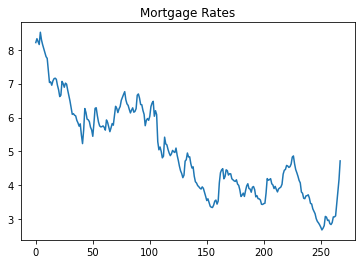

In [138]:
mortgages = pd.DataFrame({'obs_date':array_date[0:268],'mortgage_values':array_mort},columns = ['obs_date','mortgage_values'])
print(mortgages.head())
mortgages['mortgage_values'].plot()
plt.title('Mortgage Rates')
plt.show()

### 2.Median Household Income

In [142]:
mhi = pd.read_csv('median_household_income.csv',names=['obs_date','median_household_income'],header = 0,skiprows =16)
print(mhi.describe())
print(mhi.head())

       median_household_income
count                21.000000
mean              61914.428571
std                3017.902427
min               57623.000000
25%               60200.000000
50%               61553.000000
75%               63292.000000
max               69560.000000
     obs_date  median_household_income
0  2000-01-01                    63292
1  2001-01-01                    61889
2  2002-01-01                    61190
3  2003-01-01                    61113
4  2004-01-01                    60901


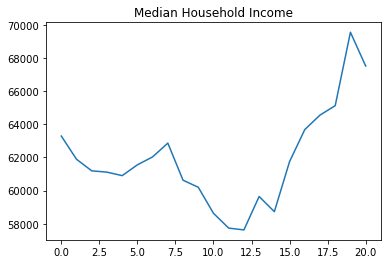

In [143]:
mhi['median_household_income'].plot()
plt.title("Median Household Income")
plt.show()

### 3.Real Disposable Income

In [144]:
rdi = pd.read_csv('real_disposable_income.csv',names=['obs_date','real_disposable_income'],header = 0,skiprows =492)
print(rdi.describe())
print(rdi.head())

       real_disposable_income
count              266.000000
mean             12315.428571
std               1854.758885
min               9309.100000
25%              10843.400000
50%              12061.100000
75%              13575.950000
max              19119.500000
     obs_date  real_disposable_income
0  2000-01-01                  9309.1
1  2000-02-01                  9345.2
2  2000-03-01                  9370.3
3  2000-04-01                  9418.3
4  2000-05-01                  9457.3


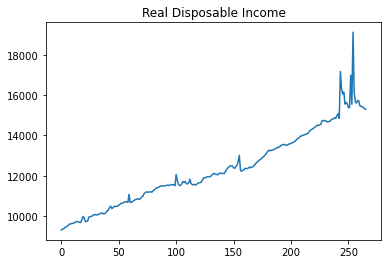

In [145]:
rdi['real_disposable_income'].plot()
plt.title("Real Disposable Income")
plt.show()

# SUPPLY FEATURES

## 1. Housing_Starts

In [146]:
housing_starts = pd.read_csv('HOUSING_STARTS.csv',names=['obs_date','housing_starts'],header = 0,skiprows =492)
print(housing_starts.describe())
print(housing_starts.head())

       housing_starts
count      266.000000
mean      1289.924812
std        454.473888
min        478.000000
25%        960.500000
50%       1258.000000
75%       1635.250000
max       2273.000000
     obs_date  housing_starts
0  2000-01-01          1636.0
1  2000-02-01          1737.0
2  2000-03-01          1604.0
3  2000-04-01          1626.0
4  2000-05-01          1575.0


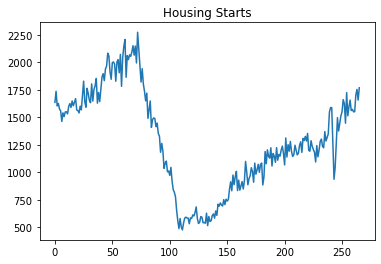

In [148]:
housing_starts['housing_starts'].plot()
plt.title("Housing Starts")
plt.show()

## 2.Supply Of Housing

In [149]:
supply_of_housing = pd.read_csv('supply_of_housing.csv',names=['obs_date','supply_of_housing'],header = 0,skiprows =444)
print(supply_of_housing.describe())
print(supply_of_housing.head())

       supply_of_housing
count         266.000000
mean            5.760902
std             1.878491
min             3.500000
25%             4.300000
50%             5.300000
75%             6.575000
max            12.200000
     obs_date  supply_of_housing
0  2000-01-01                4.3
1  2000-02-01                4.3
2  2000-03-01                4.3
3  2000-04-01                4.4
4  2000-05-01                4.4


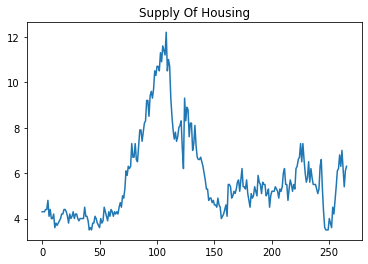

In [150]:
supply_of_housing['supply_of_housing'].plot()
plt.title("Supply Of Housing")
plt.show()

## 3.Monthly New Homes Supply

#### To get this parameter dividing the new homes for sale by new homes sold

In [167]:
new_homes_supply = pd.read_csv('New Houses sale and sold.csv',names=['obs_date','sale','sold'],header = 0,skiprows =0)
new_homes_supply['obs_date']=pd.DatetimeIndex(new_homes_supply['obs_date'])
print(new_homes_supply.describe())
print(new_homes_supply.head())

             sale        sold
count  264.000000  264.000000
mean   311.753788   58.518939
std    110.810581   25.328706
min    142.000000   20.000000
25%    225.500000   37.000000
50%    305.000000   54.500000
75%    365.250000   77.250000
max    572.000000  127.000000
    obs_date  sale  sold
0 2000-01-01   311    67
1 2000-02-01   299    78
2 2000-03-01   313    88
3 2000-04-01   305    78
4 2000-05-01   305    77


In [168]:
new_homes_supply['new_homes_supply'] = (new_homes_supply['sale']/new_homes_supply['sold'])
new_homes_supply.head()

,obs_date,sale,sold,new_homes_supply
0,2000-01-01,311,67,4.641791
1,2000-02-01,299,78,3.833333
2,2000-03-01,313,88,3.556818
3,2000-04-01,305,78,3.910256
4,2000-05-01,305,77,3.961039


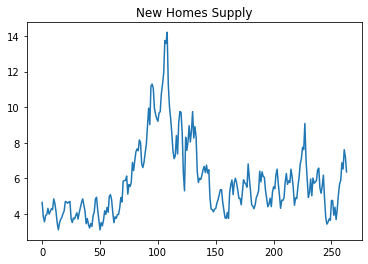

In [169]:
new_homes_supply['new_homes_supply'].plot()
plt.title("New Homes Supply")
plt.show()

## 4.Months Supply of Existing Houses

In [182]:
ehms = pd.read_excel('ehs_history_file_2022.xls', sheet_name='EHS Inventory', skiprows=48, usecols = 'A,C', names=['obs_date','existing_houses_months_supply'])
ehms['obs_date']=new_homes_supply['obs_date']
print(ehms.describe())
print(ehms.head())

       existing_houses_months_supply
count                     264.000000
mean                        5.533712
std                         2.243105
min                         1.700000
25%                         4.200000
50%                         4.700000
75%                         6.500000
max                        11.900000
    obs_date  existing_houses_months_supply
0 2000-01-01                            4.2
1 2000-02-01                            4.7
2 2000-03-01                            4.1
3 2000-04-01                            4.6
4 2000-05-01                            4.6


## 5. Production Price Index

In [183]:
ppi = pd.read_csv('production price index.csv',names=['obs_date','production_price_index'],header = 0,skiprows =163)
print(ppi.describe())
print(ppi.head())

       production_price_index
count              267.000000
mean               192.696558
std                 35.468245
min                140.100000
25%                162.400000
50%                197.600000
75%                213.300000
max                311.237000
     obs_date  production_price_index
0  2000-01-01                   142.4
1  2000-02-01                   142.7
2  2000-03-01                   143.2
3  2000-04-01                   143.2
4  2000-05-01                   142.2


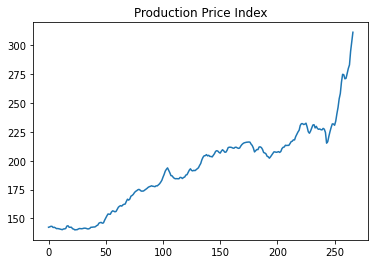

In [184]:
ppi['production_price_index'].plot()
plt.title("Production Price Index")
plt.show()

## Demand- 4.Existing Home Sales

In [195]:
ehs = pd.read_excel('ehs_history_file_2022.xls',skiprows=58,usecols="A:B",names=['obs_date','existing_home_sales'])
ehs['existing_home_sales']= ehs['existing_home_sales']/1000
ehs['obs_date']=new_homes_supply['obs_date']
print(ehs.describe())
print(ehs.head())

       existing_home_sales
count           264.000000
mean           5358.030303
std             839.175260
min            3450.000000
25%            4835.000000
50%            5315.000000
75%            5870.000000
max            7260.000000
    obs_date  existing_home_sales
0 2000-01-01               5230.0
1 2000-02-01               5120.0
2 2000-03-01               5190.0
3 2000-04-01               5200.0
4 2000-05-01               5110.0


## FULL DATA SET

In [221]:
data_set = pd.concat([ppi['obs_date'],mortgages['mortgage_values'],rdi['real_disposable_income'],ehs['existing_home_sales'],housing_starts['housing_starts'],supply_of_housing['supply_of_housing'],new_homes_supply['new_homes_supply'],ehms['existing_houses_months_supply'],ppi['production_price_index']],axis=1)
data_set['obs_date'] = pd.DatetimeIndex(data_set['obs_date'])


In [222]:
data_set.to_csv('C:/Users/anusha/Desktop/HOUSING/data_set.csv')

-- Data sourced from


1.https://fred.stlouisfed.org/


2.https://www.census.gov/econ/currentdata/dbsearch?program=RESSALES&startYear=1963&endYear=2021&categories=FORSALE&dataType=TOTAL&geoLevel=US&adjusted=1&submit=GET+DATA&releaseScheduleId=